In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
datafile = "../Data/mrgdata_food.csv"

In [4]:
df = pd.read_csv(datafile)

In [5]:
df_median = (
    pd.DataFrame([df["Median Income (dollars)"], df["Number of Fast Food"]])
    .transpose()
    .replace({"Median Income (dollars)": "-"}, 0)
    .astype("int64")
    .sort_values(by=["Median Income (dollars)"], ascending=True)
)

In [6]:
# df_median = df_median.replace({"Median Income (dollars)": "-"}, 0)

In [7]:
# df_median = df_median.astype('int64')

In [8]:
# df_median = df_median.sort_values(by=["Median Income (dollars)"], ascending=True)

In [9]:
df_median.head()

,Median Income (dollars),Number of Fast Food
54,0,0
114,0,0
0,8975,12
51,10035,13
83,15938,14


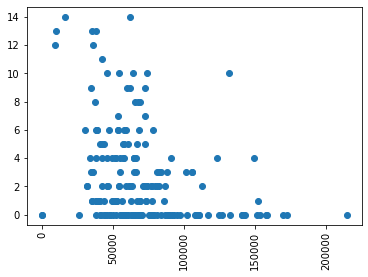

In [10]:
plt.scatter(df_median["Median Income (dollars)"], df_median["Number of Fast Food"])
plt.xticks(rotation=90)
plt.show()

The correlation between both factors is -0.34
y = -3.3618110808128836e-05x + 5.07


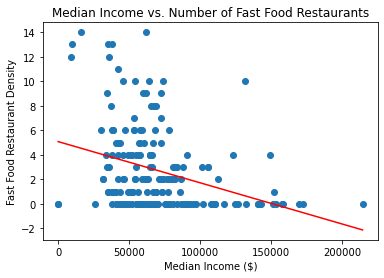

In [11]:
correlation = st.pearsonr(
    df_median["Median Income (dollars)"], df_median["Number of Fast Food"]
)
print(f"The correlation between both factors is {round(correlation[0],2)}")


from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(
    df_median["Median Income (dollars)"], df_median["Number of Fast Food"]
)
regress_values = [
    income * slope + intercept for income in df_median["Median Income (dollars)"]
]
line_eq = "y = " + str(slope) + "x + " + str(round(intercept, 2))
# line_eq
print(line_eq)
plt.scatter(df_median["Median Income (dollars)"], df_median["Number of Fast Food"])
plt.plot(df_median["Median Income (dollars)"], regress_values, "r-")
plt.title("Median Income vs. Number of Fast Food Restaurants")
plt.xlabel("Median Income ($)")
plt.ylabel("Fast Food Restaurant Density")
plt.show()

In [12]:
plt.savefig("med_inc_v_fast_food.jpg")

<Figure size 432x288 with 0 Axes>

In [13]:
df_clean = df.replace("-", 0.0)

In [14]:
income_groups = [
    "Income < $10,000",
    "Income $10,000-$14,999",
    "Income $15,000-$24,999",
    "Income $25,000-$34,999",
    "Income $35,000-$49,999",
    "Income $50,000-$74,999",
    "Income $75,000-$99,999",
    "Income $100,000-$149,999",
    "Income $150,000-$199,999",
    "Income > $200,000",
]

for group in income_groups:
    correlation = st.pearsonr(
        df_clean[group].astype(float), df_median["Number of Fast Food"]
    )
    print(
        f"The correlation between percentage of {group} and number of fast food restaurants is {round(correlation[0],2)}\n"
    )

The correlation between percentage of Income < $10,000 and number of fast food restaurants is -0.16

The correlation between percentage of Income $10,000-$14,999 and number of fast food restaurants is -0.06

The correlation between percentage of Income $15,000-$24,999 and number of fast food restaurants is -0.15

The correlation between percentage of Income $25,000-$34,999 and number of fast food restaurants is -0.04

The correlation between percentage of Income $35,000-$49,999 and number of fast food restaurants is -0.14

The correlation between percentage of Income $50,000-$74,999 and number of fast food restaurants is 0.0

The correlation between percentage of Income $75,000-$99,999 and number of fast food restaurants is 0.14

The correlation between percentage of Income $100,000-$149,999 and number of fast food restaurants is 0.13

The correlation between percentage of Income $150,000-$199,999 and number of fast food restaurants is 0.04

The correlation between percentage of Income

In [15]:
race_groups = [
    "White Population",
    "Black or African American Population",
    "American Indian and Alaska Native Population",
    "Asian Population",
    "Native Hawaiian and Other Pacific Islander population",
    "Some Other Race Population",
]

for group in race_groups:
    correlation = st.pearsonr(
        df_clean[group].astype(float), df_median["Number of Fast Food"]
    )
    print(
        f"The correlation between {group} and number of fast food restaurants is {round(correlation[0],2)}\n"
    )

The correlation between White Population and number of fast food restaurants is -0.14

The correlation between Black or African American Population and number of fast food restaurants is 0.01

The correlation between American Indian and Alaska Native Population and number of fast food restaurants is -0.11

The correlation between Asian Population and number of fast food restaurants is -0.02

The correlation between Native Hawaiian and Other Pacific Islander population and number of fast food restaurants is -0.04

The correlation between Some Other Race Population and number of fast food restaurants is -0.12

